In [19]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from os import listdir
from os.path import isfile, join
from trajectory_vars import *


TUNNEL, SACCADE = 'tunnel', 'saccade'
TUNNEL_F, SACCADE_F = 'tunnel_failed', 'saccade_failed'
ALGS = [TUNNEL, SACCADE, TUNNEL_F, SACCADE_F]

COLORS = {
    'tree': '#99b88a',
    SACCADE: '#f95d6a',
    SACCADE_F: '#ffa600',
    TUNNEL: '#003f5c',
    TUNNEL_F: '#a05195',
}

LABELS = {
    TUNNEL: 'Tunnel',
    TUNNEL_F: 'Tunnel failed',
    SACCADE: 'Saccade',
    SACCADE_F: 'Saccade failed'
}


def read_world(fname):
    with open(join('worlds/', fname + '.csv')) as world_file:
        reader = csv.DictReader(world_file, delimiter=',')
        rows = []
        for row in reader:
            rows.append(row)
        return rows
    
    
def plot_trajectory(path, fname_world, failed=[], save=False, limits=[(-10, 50), (10, 70)], title=None):

    # Obstacles
    obstacles = read_world(fname_world)
    fig, ax = plt.subplots(figsize=(4, 4))
    xs, ys = [], []
    c = 0.3

    for obstacle in obstacles:
        xs.append(float(obstacle[X]))
        ys.append(- float(obstacle[Y]))


    ax.plot(ys, xs, 'o', color=COLORS['tree'], markersize=10, label='tree')
    # for size in np.linspace(0, 1, 20):
    #     ax.plot(ys, xs, 'o', color=COLORS['tree'], markersize= c * size * float(obstacle[SIZE]), alpha=max(0.1, 0.9-size))
    ax.plot(ys, xs, 'o', color=COLORS['tree'], markersize= c * float(obstacle[SIZE]))

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    if title:
        fig.suptitle(title)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    if save:
        plt.savefig('figs/' + fname_world + '-world.pdf')


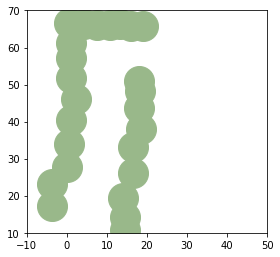

In [23]:
failed = ['tunnel-0.bag', 'saccade-0.bag', 'saccade-2.bag', 'saccade-4.bag']
title = False
plot_trajectory('90-degree', 'corridor-90', failed=failed, save=True, title=title)

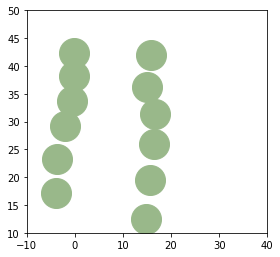

In [24]:
failed = ['saccade-0.bag', 'saccade-1.bag']
limits = [[-10, 40], [10, 50]]
title = False
plot_trajectory('straight', 'corridor', failed=failed, save=True, limits=limits, title=title)

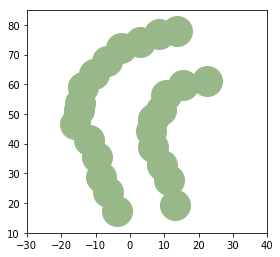

In [25]:
failed = []
limits = [(-30, 40), (10, 85)]
title = False
plot_trajectory('curvy', 'curve-corridor', failed=failed, save=True, limits=limits, title=title)

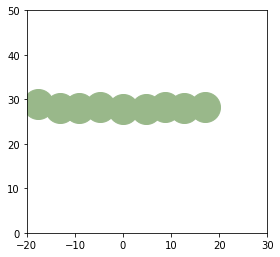

In [26]:
failed = []
limits = [(-20, 30), (0, 50)]
title = False
plot_trajectory('wall', 'wall', failed=failed, save=True, limits=limits, title=title)

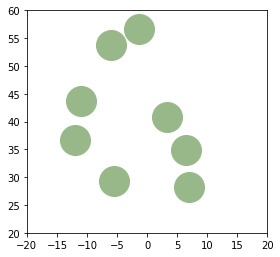

In [27]:
failed = ['tunnel-4.bag', 'saccade-1.bag']
limits = [[-20, 20], [20, 60]]
title = False
plot_trajectory('random', 'random', failed=failed, save=True, limits=limits, title=title)